In [32]:
import gzip
from collections import defaultdict
import random
import scipy
from implicit import bpr
from collections import defaultdict
import math
import tensorflow as tf
from collections import defaultdict
import pandas as pd
import csv
import matplotlib.pyplot as plt
from collections import Counter


In [49]:
file_path = './archive/RAW_recipes.csv'

minutes = [] #index 2
# tags = [] #index5
nutrition = [] #index 6
nsteps = [] #index7
# steps = [] #index8
# description = [] #index9
# ingredients = [] #index10
ningredients = [] #index11

with open(file_path, 'r') as file:
    reader = csv.reader(file)
    count = 0
    for row in reader:
        count +=1
        if count == 1:
            continue
        minutes.append(int(row[2]))
        # tags.append(row[5])
        nutrition.append(row[6])
        nsteps.append(int(row[7]))
        # steps.append(row[8])
        # description.append(row[9])
        # ingredients.append(row[10])
        ningredients.append(int(row[11]))

[(0, 1094), (1, 542), (2, 1888), (3, 1143), (4, 613), (5, 9449), (6, 779), (7, 949), (8, 847), (9, 261), (10, 11291), (11, 574), (12, 1023), (13, 923), (14, 333), (15, 12213), (16, 623), (17, 1126), (18, 1049), (19, 304), (20, 14822), (21, 498), (22, 1416), (23, 884), (24, 311), (25, 13204), (26, 403), (27, 1106), (28, 787), (29, 207), (30, 18391), (31, 284), (32, 824), (33, 531), (34, 162), (35, 12385), (36, 184), (37, 426), (38, 435), (39, 113), (40, 13772), (41, 93), (42, 440), (43, 211), (44, 109), (45, 11517), (46, 120), (47, 168), (48, 205), (49, 43), (50, 9929), (51, 62), (52, 131), (53, 128), (54, 53), (55, 7173), (56, 48), (57, 119), (58, 82), (59, 28), (60, 10302), (61, 54), (62, 102), (63, 106), (64, 43), (65, 5495), (66, 47), (67, 75), (68, 84), (69, 17), (70, 6154), (71, 17), (72, 98), (73, 30), (74, 27), (75, 6267), (76, 26), (77, 19), (78, 42), (79, 30), (80, 4390), (81, 22), (82, 43), (83, 20), (84, 28), (85, 1804), (86, 17), (87, 35), (88, 21), (89, 19), (90, 3939), (9

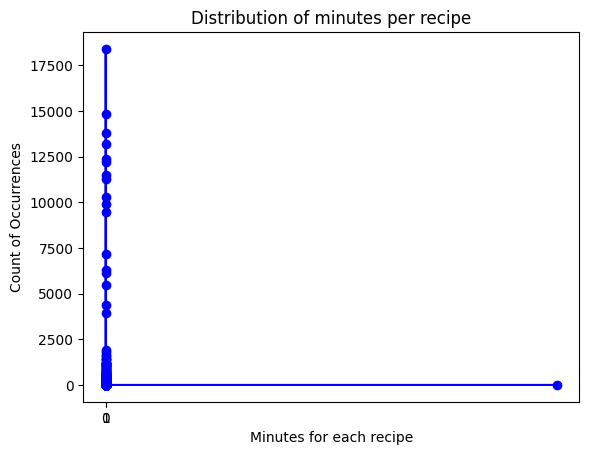

In [59]:
#visualizing distribution of nsteps
dictMinutes = defaultdict(int)
for i in minutes:
        dictMinutes[i] += 1
        
sorted_dictMinutes = sorted(dictMinutes.items())
print(sorted_dictMinutes)


plt.plot([x[0] for x in sorted_dictMinutes], [x[1] for x in sorted_dictMinutes], marker='o', color='blue')

# Add labels and title
plt.xlabel('Minutes for each recipe')
plt.ylabel('Count of Occurrences')
plt.title('Distribution of minutes per recipe')
custom_intervals = [0, 1]  # Modify this list according to your needs
plt.xticks(custom_intervals)
plt.show() 

defaultdict(<class 'int'>, {11: 14131, 9: 18265, 6: 19927, 5: 18047, 4: 14753, 10: 16272, 8: 19980, 12: 11940, 2: 6982, 7: 20785, 20: 2468, 14: 8297, 13: 10137, 3: 11461, 25: 926, 26: 791, 41: 74, 15: 6759, 16: 5522, 1: 2442, 21: 2005, 18: 3621, 17: 4640, 19: 3184, 38: 100, 24: 1128, 39: 85, 27: 654, 33: 233, 30: 364, 44: 45, 22: 1683, 36: 139, 28: 545, 34: 182, 35: 149, 23: 1334, 29: 428, 46: 28, 45: 42, 37: 107, 108: 1, 52: 9, 70: 4, 73: 2, 43: 40, 40: 80, 51: 14, 31: 298, 42: 50, 32: 244, 53: 15, 0: 1, 47: 30, 64: 4, 55: 19, 62: 6, 48: 27, 61: 5, 76: 3, 49: 30, 80: 1, 58: 6, 50: 15, 77: 1, 93: 1, 67: 2, 56: 9, 82: 3, 66: 3, 90: 1, 60: 5, 54: 9, 57: 9, 68: 1, 113: 1, 110: 1, 88: 2, 100: 1, 65: 3, 59: 5, 145: 1, 63: 6, 81: 3, 86: 1, 75: 1, 69: 2, 85: 1, 79: 1, 87: 1, 71: 1, 72: 1, 97: 1, 98: 1})
[(0, 1), (1, 2442), (2, 6982), (3, 11461), (4, 14753), (5, 18047), (6, 19927), (7, 20785), (8, 19980), (9, 18265), (10, 16272), (11, 14131), (12, 11940), (13, 10137), (14, 8297), (15, 6759), (

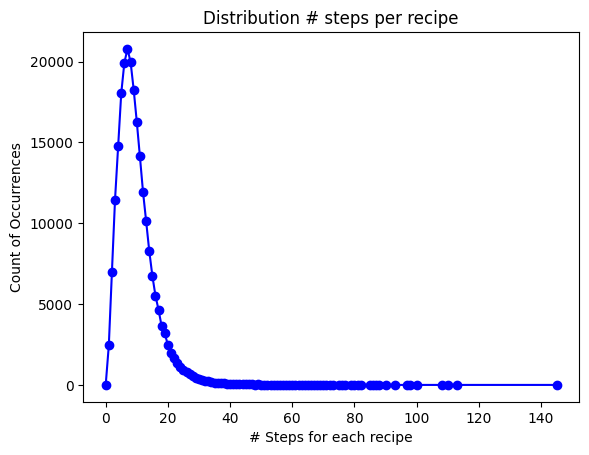

In [38]:
#visualizing distribution of nsteps
dictNsteps = defaultdict(int)
for i in nsteps:
        dictNsteps[i] += 1
        
sorted_dictNsteps = sorted(dictNsteps.items())

plt.plot([x[0] for x in sorted_dictNsteps], [x[1] for x in sorted_dictNsteps], marker='o',color = 'blue')

# Add labels and title
plt.xlabel('# Steps for each recipe')
plt.ylabel('Count of Occurrences')
plt.title('Distribution # steps per recipe')
# custom_intervals = [1, 10, 20, 30, 40, 50, 60, 70, 80]  # Modify this list according to your needs
# plt.xticks(custom_intervals)
plt.show()      

        

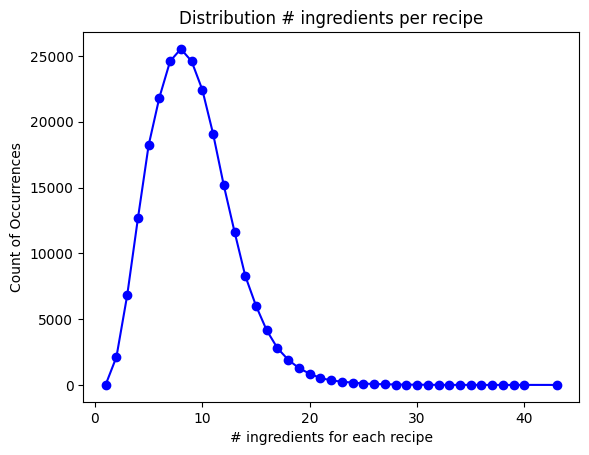

In [60]:
#visualizing distribution of nsteps
dictNingredients = defaultdict(int)
for i in ningredients:
        dictNingredients[i] += 1
        
sorted_dictNingredients = sorted(dictNingredients.items())

plt.plot([x[0] for x in sorted_dictNingredients], [x[1] for x in sorted_dictNingredients], marker='o',color = 'blue')

# Add labels and title
plt.xlabel('# ingredients for each recipe')
plt.ylabel('Count of Occurrences')
plt.title('Distribution # ingredients per recipe')
# custom_intervals = [1, 10, 20, 30, 40, 50, 60, 70, 80]  # Modify this list according to your needs
# plt.xticks(custom_intervals)
plt.show()


In [64]:
print(nutrition[0])

[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]


In [99]:
# nutrition values
calories = []
total_fat = []
sugar = []
sodium = []
protien = []
saturated_fat = []
carbohydrates = []

In [109]:
for x in nutrition:
    i = x.strip("[]").replace(",", "").split()
    calories.append(float(i[0]))
    total_fat.append(float(i[1]))
    sugar.append(float(i[2]))
    sodium.append(float(i[3]))
    protien.append(float(i[4]))
    saturated_fat.append(float(i[5]))
    carbohydrates.append(float(i[6]))

In [167]:
def visualize(currList, label, window = 0):
        #visualizing distribution of nsteps
        dict_freq = defaultdict(int)
        for i in currList:
                dict_freq[i] += 1
        
        print(dict_freq.items())
        sorted_dict_freq = sorted(dict_freq.items(), key=lambda x: float(x[0]))

        for i in sorted_dict_freq:
                if type(i[0]) == type('string'):
                        sorted_dict_freq.remove(i)

        print(sorted_dict_freq)
        plt.plot([x[0] for x in sorted_dict_freq], [x[1] for x in sorted_dict_freq], marker='o',color = 'blue')

        # Add labels and title
        plt.xlabel(label + ' for each recipe')
        plt.ylabel('Count of Occurrences')
        plt.title('Distribution ' + label + ' per recipe')
        if window != 0:
                plt.xlim(0,window)
        # custom_intervals = [1, 10, 20, 30, 40, 50, 60, 70, 80]  # Modify this list according to your needs
        # plt.xticks(custom_intervals)
        plt.show()

dict_items([('51.5', 40), ('173.4', 46), ('269.8', 49), ('368.1', 33), ('352.9', 28), ('160.2', 54), ('380.7', 25), ('1109.5', 4), ('4270.8', 1), ('2669.3', 1), ('79.2', 52), ('734.1', 8), ('462.4', 23), ('315.8', 39), ('8.2', 10), ('105.7', 46), ('94.0', 43), ('232.7', 49), ('395.4', 37), ('174.2', 65), ('126.0', 57), ('64.8', 43), ('335.8', 32), ('1663.3', 2), ('1290.4', 1), ('182.7', 39), ('295.6', 41), ('346.9', 35), ('132.6', 45), ('804.7', 6), ('174.4', 36), ('456.8', 16), ('1649.8', 3), ('190.9', 38), ('164.6', 44), ('276.2', 34), ('166.1', 47), ('152.5', 37), ('53.8', 34), ('647.6', 19), ('783.4', 12), ('172.8', 46), ('171.8', 42), ('223.2', 46), ('279.2', 54), ('241.0', 32), ('816.9', 9), ('5467.4', 1), ('612.1', 10), ('400.2', 30), ('724.4', 8), ('370.5', 41), ('794.2', 5), ('575.3', 11), ('987.8', 5), ('1615.2', 2), ('175.2', 58), ('255.2', 41), ('3.1', 10), ('67.1', 26), ('325.3', 34), ('115.9', 37), ('199.2', 41), ('22.9', 10), ('510.6', 21), ('3.0', 13), ('181.1', 41), ('

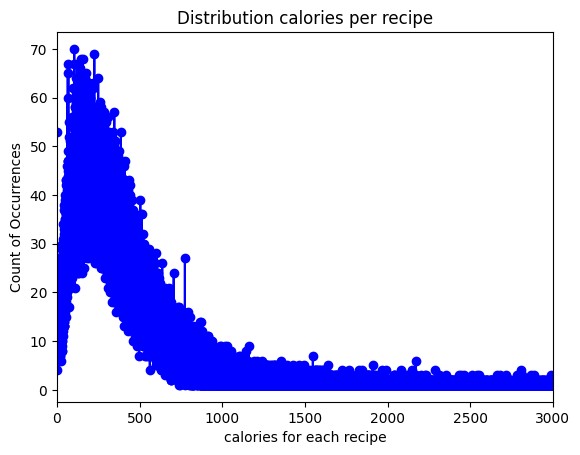

In [161]:
visualize(calories, "calories", 3000)

dict_items([('0.0', 16770), ('18.0', 4305), ('22.0', 3799), ('17.0', 4193), ('1.0', 5834), ('10.0', 5591), ('53.0', 1165), ('83.0', 460), ('254.0', 28), ('160.0', 78), ('3.0', 5033), ('66.0', 624), ('28.0', 3230), ('8.0', 5342), ('21.0', 4242), ('31.0', 2670), ('4.0', 5104), ('11.0', 5237), ('221.0', 43), ('213.0', 36), ('24.0', 3417), ('108.0', 190), ('13.0', 4926), ('40.0', 1885), ('91.0', 281), ('16.0', 4505), ('2.0', 4914), ('5.0', 5609), ('57.0', 978), ('46.0', 1501), ('9.0', 5339), ('14.0', 4858), ('12.0', 5106), ('100.0', 234), ('516.0', 5), ('49.0', 1329), ('32.0', 2551), ('38.0', 2080), ('109.0', 177), ('75.0', 495), ('154.0', 65), ('7.0', 5647), ('50.0', 1378), ('26.0', 3247), ('45.0', 1609), ('39.0', 1951), ('36.0', 2262), ('58.0', 883), ('129.0', 109), ('34.0', 2257), ('97.0', 236), ('43.0', 1782), ('55.0', 1123), ('6.0', 5689), ('235.0', 18), ('470.0', 5), ('653.0', 4), ('29.0', 2954), ('61.0', 862), ('130.0', 111), ('30.0', 2718), ('19.0', 3905), ('41.0', 1913), ('63.0', 

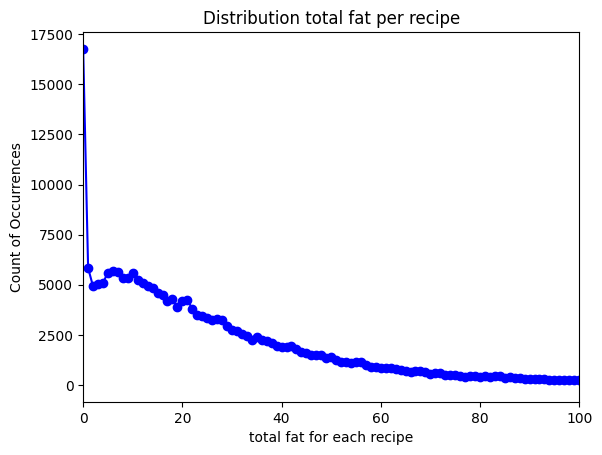

In [180]:
visualize(total_fat, "total fat", 100)

dict_items([('13.0', 4557), ('0.0', 10322), ('32.0', 1861), ('10.0', 4923), ('337.0', 32), ('55.0', 981), ('7.0', 5250), ('378.0', 20), ('1306.0', 5), ('976.0', 13), ('58.0', 838), ('199.0', 145), ('214.0', 100), ('202.0', 174), ('77.0', 562), ('20.0', 3191), ('24.0', 2647), ('2.0', 5491), ('168.0', 167), ('4.0', 5371), ('56.0', 897), ('18.0', 3530), ('26.0', 2565), ('67.0', 859), ('34.0', 1867), ('5.0', 5312), ('6.0', 5576), ('57.0', 927), ('107.0', 425), ('61.0', 779), ('28.0', 2399), ('12.0', 4720), ('1.0', 6232), ('11.0', 4773), ('1196.0', 7), ('170.0', 152), ('43.0', 1254), ('297.0', 30), ('21.0', 3128), ('9.0', 5157), ('116.0', 314), ('195.0', 121), ('323.0', 36), ('15.0', 4005), ('39.0', 1504), ('98.0', 391), ('29.0', 2120), ('164.0', 168), ('410.0', 22), ('8.0', 5269), ('91.0', 433), ('113.0', 350), ('362.0', 16), ('64.0', 694), ('66.0', 723), ('16.0', 3914), ('104.0', 451), ('45.0', 1204), ('984.0', 4), ('3.0', 5135), ('119.0', 319), ('133.0', 334), ('1941.0', 2), ('65.0', 679

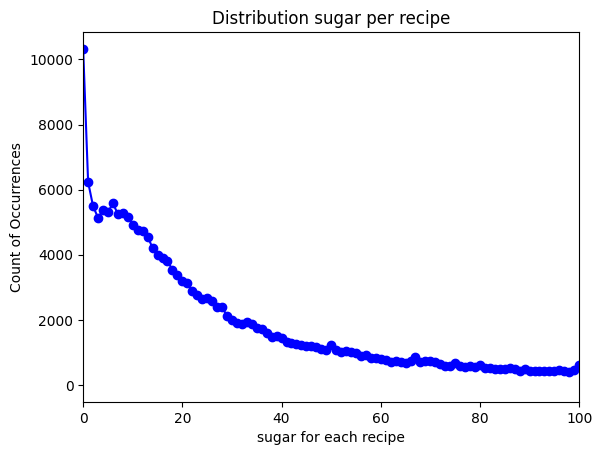

In [179]:
visualize(sugar, "sugar", 100)

# sodium = []
# protien = []
# saturated_fat = []
# carbohydrates = []

dict_items([('0.0', 19841), ('17.0', 4101), ('48.0', 1301), ('2.0', 9014), ('23.0', 2911), ('3.0', 8636), ('24.0', 3461), ('275.0', 6), ('111.0', 132), ('107.0', 151), ('10.0', 5842), ('69.0', 445), ('9.0', 6139), ('26.0', 2840), ('11.0', 5171), ('4.0', 8089), ('29.0', 2458), ('1.0', 9557), ('14.0', 4746), ('54.0', 857), ('66.0', 496), ('53.0', 846), ('76.0', 361), ('42.0', 1444), ('19.0', 3671), ('5.0', 7483), ('67.0', 519), ('128.0', 71), ('18.0', 3972), ('32.0', 2244), ('13.0', 4950), ('58.0', 749), ('56.0', 763), ('7.0', 6789), ('22.0', 3088), ('97.0', 329), ('135.0', 68), ('25.0', 2963), ('31.0', 2299), ('20.0', 3511), ('57.0', 717), ('30.0', 2392), ('34.0', 1937), ('106.0', 126), ('74.0', 381), ('8.0', 6511), ('39.0', 1602), ('21.0', 3466), ('12.0', 5720), ('15.0', 4328), ('71.0', 382), ('116.0', 132), ('36.0', 1863), ('87.0', 260), ('149.0', 68), ('35.0', 1887), ('101.0', 178), ('41.0', 1469), ('96.0', 188), ('46.0', 1224), ('83.0', 283), ('260.0', 14), ('90.0', 235), ('159.0', 

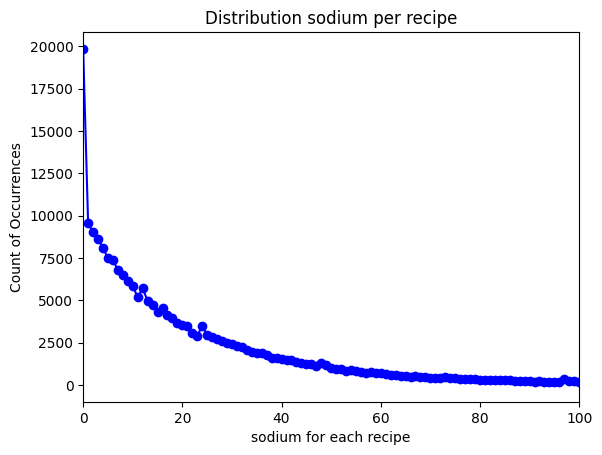

In [181]:
visualize(sodium, "sodium", 100)

# sodium = []
# protien = []
# saturated_fat = []
# carbohydrates = []

dict_items([('2.0', 8263), ('22.0', 2356), ('39.0', 1489), ('14.0', 4151), ('3.0', 8013), ('9.0', 6227), ('6.0', 7650), ('96.0', 445), ('127.0', 216), ('62.0', 1284), ('0.0', 9837), ('10.0', 5802), ('1.0', 7853), ('5.0', 7982), ('11.0', 5293), ('51.0', 1524), ('15.0', 3874), ('4.0', 7839), ('64.0', 1194), ('19.0', 2820), ('13.0', 4393), ('32.0', 1784), ('42.0', 1438), ('28.0', 1884), ('57.0', 1361), ('80.0', 665), ('45.0', 1432), ('23.0', 2294), ('7.0', 7605), ('54.0', 1452), ('36.0', 1559), ('8.0', 7130), ('35.0', 1618), ('98.0', 412), ('110.0', 256), ('21.0', 2569), ('18.0', 3010), ('53.0', 1385), ('59.0', 1212), ('104.0', 354), ('182.0', 31), ('26.0', 2028), ('90.0', 504), ('12.0', 4986), ('17.0', 3208), ('56.0', 1420), ('31.0', 1755), ('40.0', 1423), ('103.0', 314), ('102.0', 366), ('72.0', 964), ('79.0', 685), ('140.0', 120), ('228.0', 7), ('58.0', 1357), ('81.0', 673), ('50.0', 1538), ('44.0', 1348), ('20.0', 2694), ('34.0', 1629), ('148.0', 106), ('106.0', 315), ('111.0', 237), 

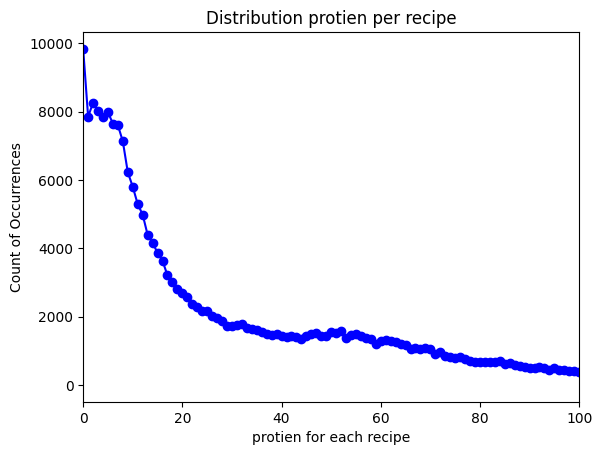

In [182]:
visualize(protien, "protien", 100)

# protien = []
# saturated_fat = []
# carbohydrates = []

dict_items([('0.0', 19732), ('35.0', 1935), ('27.0', 2684), ('8.0', 4426), ('20.0', 2915), ('24.0', 2916), ('86.0', 565), ('431.0', 8), ('310.0', 15), ('6.0', 5726), ('117.0', 237), ('29.0', 2232), ('4.0', 5927), ('21.0', 2638), ('38.0', 2010), ('33.0', 1999), ('1.0', 6715), ('23.0', 2583), ('2.0', 6545), ('10.0', 4272), ('158.0', 89), ('417.0', 12), ('30.0', 2204), ('5.0', 5669), ('214.0', 33), ('26.0', 2478), ('51.0', 1386), ('160.0', 102), ('15.0', 3308), ('3.0', 6307), ('53.0', 1223), ('11.0', 3901), ('180.0', 85), ('615.0', 8), ('39.0', 1927), ('54.0', 1269), ('31.0', 2077), ('64.0', 930), ('153.0', 146), ('22.0', 2679), ('83.0', 568), ('193.0', 50), ('13.0', 4000), ('17.0', 3034), ('70.0', 715), ('91.0', 454), ('67.0', 864), ('61.0', 996), ('113.0', 289), ('63.0', 953), ('211.0', 61), ('18.0', 3712), ('16.0', 3179), ('7.0', 4832), ('119.0', 222), ('36.0', 2133), ('165.0', 114), ('443.0', 12), ('1218.0', 1), ('104.0', 321), ('12.0', 4259), ('37.0', 2169), ('118.0', 238), ('19.0', 

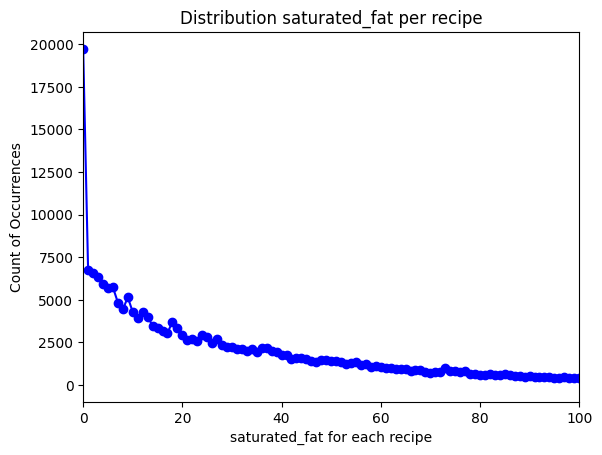

In [183]:
visualize(saturated_fat, "saturated_fat", 100)

# saturated_fat = []
# carbohydrates = []

dict_items([('4.0', 13316), ('1.0', 13617), ('5.0', 12381), ('20.0', 3600), ('28.0', 1389), ('7.0', 10687), ('6.0', 11524), ('36.0', 657), ('220.0', 10), ('138.0', 36), ('23.0', 2494), ('21.0', 3216), ('0.0', 13068), ('3.0', 13828), ('8.0', 10274), ('10.0', 9535), ('29.0', 1433), ('18.0', 4318), ('9.0', 10175), ('78.0', 75), ('2.0', 14219), ('11.0', 8723), ('16.0', 5483), ('37.0', 503), ('12.0', 8060), ('188.0', 12), ('25.0', 2039), ('14.0', 6808), ('39.0', 428), ('34.0', 765), ('30.0', 1186), ('17.0', 4896), ('51.0', 198), ('24.0', 2305), ('38.0', 491), ('40.0', 417), ('13.0', 7488), ('19.0', 3977), ('132.0', 35), ('226.0', 7), ('155.0', 46), ('117.0', 64), ('57.0', 160), ('26.0', 1761), ('205.0', 21), ('32.0', 984), ('224.0', 14), ('15.0', 6144), ('33.0', 874), ('58.0', 147), ('109.0', 66), ('27.0', 1553), ('31.0', 1098), ('50.0', 236), ('164.0', 26), ('118.0', 50), ('73.0', 90), ('22.0', 2860), ('62.0', 125), ('45.0', 263), ('72.0', 79), ('245.0', 11), ('139.0', 52), ('217.0', 14), 

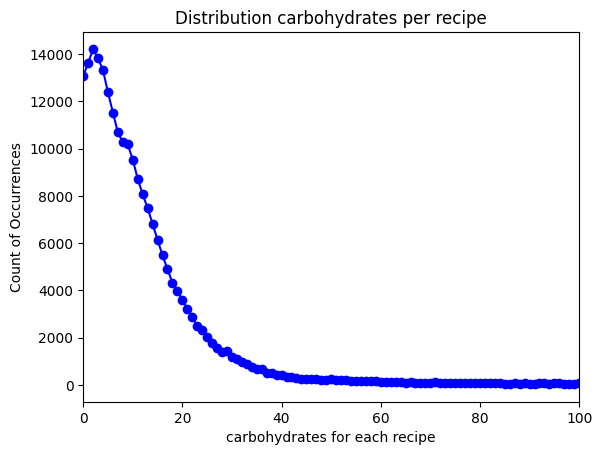

In [184]:
visualize(carbohydrates, "carbohydrates", 100)

# saturated_fat = []
# carbohydrates = []